https://youtu.be/w9U57o6wto0

In [53]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

Suppose one has data that consists of an independent vector $x_i$ and a dependent vector $y_i$  and  ($i$ is the ith value in the data set). For example:

 - $x_i$ is the height of the $i$ th person, and $y_i$ is their weight (predict weight using height)
- $x_i$ is a picture of a handwritten digit, and $y_i$ is the digit itself (predict numbers from hand written numbers)
- $x_i$ is a CT scan of a patient, and $y_i$ are the corresponding pixels corresponding to tumours (my research)
<br>
<br>
The goal of a neural network is as follows. Define a function $f$ that depends on parameters $a$ that makes predictions
$$\hat{y_i} = f(x_i ; a)$$

One wants to make $\hat{y_i}$ (the predictions) and $y_i$ (the true values) as close as possible by modifying the values of $a$. What does as close as possible mean? This depends on the task. In general, one defines a similarity function (or Loss function) $L(y, \hat{y})$. The more similar all the $y$ s and $\hat{y_i}$ s are, the smaller $L$ should be. For example 1 above, this could be as simple as
$$L(y, \hat{y}) = \sum_i{(y_i - \hat{y_i})^2}$$

In [54]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

In [55]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [56]:
y

tensor([1., 5., 2., 5.])

- So $x_1$ = (6,2) , $x_2$ = (5,2) , ...
- So $y_1$ = 1, $y_2$ = 5 , ...

We want to find a function $f$ that depends on parameters $a$ that gives $y$ for $x$ .
<br>
<br>
IDEA:<br>
These are basically weight matrices:
1. First multiply each element in $x$ by a 8 x 2 matrix (this is 16 parameters $a_i$) -- FIRST LAYER
- *In my understanding this should be 2 x 8 matrix* - but I am wrong, don't know why
2. Then multiply each element in $x$ by a 1 x 8 matrix (this is 8 parameters $a_i$) -- SECOND LAYER

Define a matrix (takes in a 2d vector and returns a 8d vector).

- **IMPORTANT**: When the matrix is created, it is initially created with random values.


In [57]:
M1 = nn.Linear(2, 8, bias=False) #take in 2 features and outputs 8 features.
M1

Linear(in_features=2, out_features=8, bias=False)

In [58]:
M1(x)

tensor([[ 4.1619, -0.7091,  0.1967,  1.9435, -3.9459, -4.8398,  3.0988, -4.1165],
        [ 3.6198, -0.4581,  0.0821,  1.5131, -3.2544, -4.2518,  2.8031, -3.5238],
        [ 1.9062,  0.9450, -0.6216, -0.5278, -0.3873, -2.5560,  2.2826, -1.4334],
        [ 6.5228,  0.6346, -0.6703,  1.0963, -4.2319, -8.0518,  6.0437, -5.8301]],
       grad_fn=<MmBackward0>)

In [59]:
M1(x).shape

torch.Size([4, 8])

We can chain this with a second matrix M2

In [60]:
M2 = nn.Linear(8, 1, bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [61]:
M2(M1(x))

tensor([[-2.2415],
        [-1.9139],
        [-0.7412],
        [-3.1205]], grad_fn=<MmBackward0>)

In [62]:
y

tensor([1., 5., 2., 5.])

**NOTE:** M2(M1(x)) is 2D but y is 1D. So we want our prediction in 1D

In [63]:
M2(M1(x)).shape

torch.Size([4, 1])

In [64]:
M2(M1(x)).squeeze()

tensor([-2.2415, -1.9139, -0.7412, -3.1205], grad_fn=<SqueezeBackward0>)

The weights of the matrices M1 and M2 consitute the weights $a$ of the network defined above. In order to optimize for these weights, we first construct our network $f$ as follows:

In [65]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)

    def forward(self, x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()
        

Constructing the network using a subclass of the nn.Module allows the parameters of the network to be conveniently stored. This will be useful later when we need to adjust them.

In [66]:
f = MyNeuralNet()

In [67]:
f(x)

tensor([0.9743, 0.8129, 0.1700, 1.1472], grad_fn=<SqueezeBackward0>)

In [68]:
for par in f.parameters(): #parameter() is an inbuilt method of nn.module to store the weights
    print(par)

Parameter containing:
tensor([[ 0.5724,  0.1172],
        [ 0.6514, -0.2345],
        [-0.1642, -0.3892],
        [ 0.6756,  0.3269],
        [-0.2448, -0.3653],
        [-0.1739,  0.1717],
        [ 0.6896, -0.4338],
        [ 0.3598, -0.1451]], requires_grad=True)
Parameter containing:
tensor([[ 0.0944, -0.2798, -0.1542,  0.2334,  0.2602, -0.0479,  0.2668, -0.0611]],
       requires_grad=True)


In [69]:
for par in f.parameters():
    print(par.shape)

torch.Size([8, 2])
torch.Size([1, 8])


In [70]:
yhat = f(x)
yhat

tensor([0.9743, 0.8129, 0.1700, 1.1472], grad_fn=<SqueezeBackward0>)

## Adjust $a$ so that $y$ and $\hat{y}$ are similar

Now we define the loss function $L$, which provides a metric of similarity between $y$ and $\hat{y}$. In this case, we will use the mean squared error loss function:

In [71]:
L = nn.MSELoss()
L(y, yhat)

tensor(8.9314, grad_fn=<MseLossBackward0>)

Confirming whether it is doing the mean-sqaured error:

In [72]:
torch.mean((y-yhat)**2)

tensor(8.9314, grad_fn=<MeanBackward0>)

Note that $L$ depends on $a$ , since our predictions $\hat{y}$ depend on the parameters of the network $a$ . In this sense, $L = f(a)$. **The main idea behind machine learning** is to compute
 $$\frac{\partial{L}}{\partial{a_i}}$$

 for each parameter $a_i$ of the network. Then we adjust each parameter as follows:
 $$ a_i \rightarrow a_i - \ell \frac{\partial{L}}{\partial{a_i}}$$

 where $ \ell $ is the learning rate.

A loss function that only depends on 1 paramter:

<img src="https://github.com/lukepolson/youtube_channel/raw/404c306bf6976c12f1bb2afba709294f9fe3d3fc/images/loss.PNG" style="width:1000px;height:300px;">

The idea is to do this over and over again, until one reaches a minimum for $L$ . **This is called gradient descent**.
- Each pass of the full data set $x$ is called an **epoch**. In this case, we are evaluating $\frac{\partial{L}}{\partial{a_i}}$ on the entire dataset $x$ each time we iterate $ a_i \rightarrow a_i - \ell \frac{\partial{L}}{\partial{a_i}}$, so each iteration corresponds to an epoch.
- For a very large dataset, the data is divided into batches. Say we have 5 batches, then $\frac{\partial{L}}{\partial{a_i}}$ is calculated for each batch separately. When all 5 batches are done, that's called 1 epoch.

The SGD(meaning stochastic gradient descent) takes in all model parameters $a$ along with the learning rate $ \ell $.

In [73]:
opt = SGD(f.parameters(), lr=0.001)

Adjust the parameters over and over to optimize.

In [74]:
losses = []

for _ in range(1000):
    opt.zero_grad() #flush previous epoch's gradient
    loss_value = L(y,f(x)) #compute loss
    loss_value.backward() #compute gradient
    opt.step() #perform iteration using gradient above
    losses.append(loss_value.item())

In [75]:
loss_value

tensor(2.3727, grad_fn=<MseLossBackward0>)

In [76]:
loss_value.item()

2.3726694583892822

plot $ L(a)$  as a function of epochs

Text(0.5, 0, 'epochs')

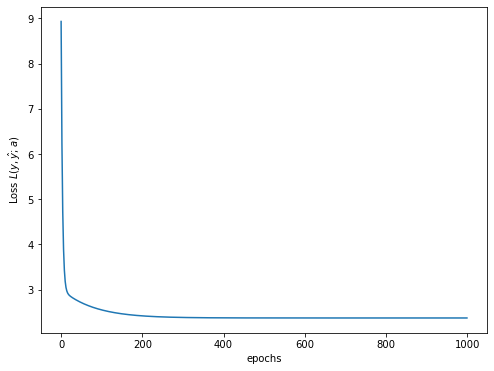

In [81]:
plt.figure(figsize=(8,6))
plt.plot(losses)
plt.ylabel('Loss $L(y,\hat{y};a)$')
plt.xlabel('epochs')

This is as close as we can make the model $f$ predict $y$ from $x$:

In [78]:
f(x)

tensor([2.7782, 2.4997, 1.9390, 5.2707], grad_fn=<SqueezeBackward0>)

In [79]:
y

tensor([1., 5., 2., 5.])

- We looked at the flow to create a custom Neural network.
- The prediction don't matter here because we don't have any data reasonable for a neural network model.
- Here we have a very basic NeuralNet with 24 parameters, first layer of 16 and second layer of 8.
- We will build complex NeuralNets in future.